Імпорт бібліотек та налаштування для кращого відображення графіків

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set(style="whitegrid")

Завантаження та підготовка даних

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

df = pd.read_csv(url, header = None, names = columns, na_values = '?')

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB
None


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Налаштування даних

In [3]:
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')

df_cleaned = df.dropna()

print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB
None


Графік залежності Scatterplot для залежності між віком та максимальною частотою скорочень серця

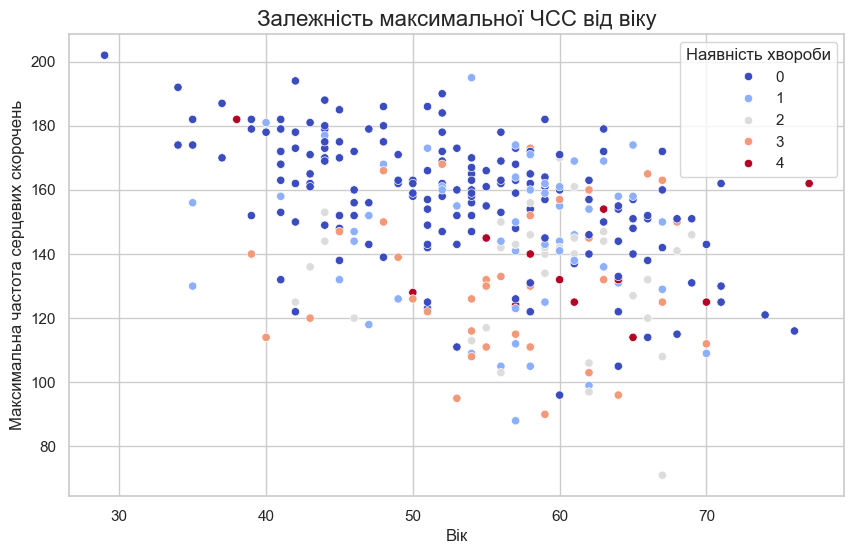

In [4]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df_cleaned, x = 'age', y = 'thalach', hue = 'target', palette = 'coolwarm')
plt.title('Залежність максимальної ЧСС від віку', fontsize = 16)
plt.xlabel('Вік')
plt.ylabel('Максимальна частота серцевих скорочень')
plt.legend(title = 'Наявність хвороби')
plt.show()

Гістограма для рівня холестерину, 5 діапазонів

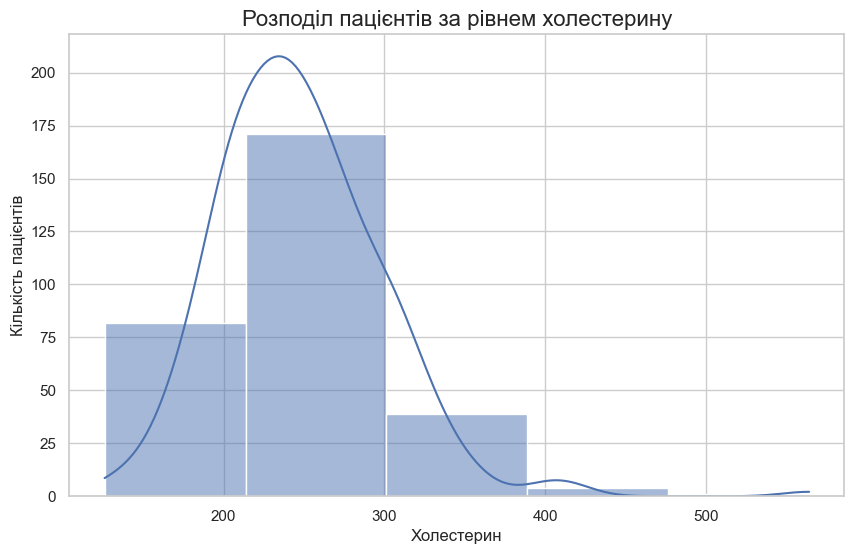

In [8]:
plt.figure(figsize = (10, 6))
sns.histplot(data = df_cleaned, x = 'chol', bins = 5, kde = True)
plt.title('Розподіл пацієнтів за рівнем холестерину', fontsize = 16)
plt.xlabel('Холестерин')
plt.ylabel('Кількість пацієнтів')
plt.show()

Графік pairplot для візуалізації залежності між віком, тиском, холестерином, макс. ЧСС та дисперсією

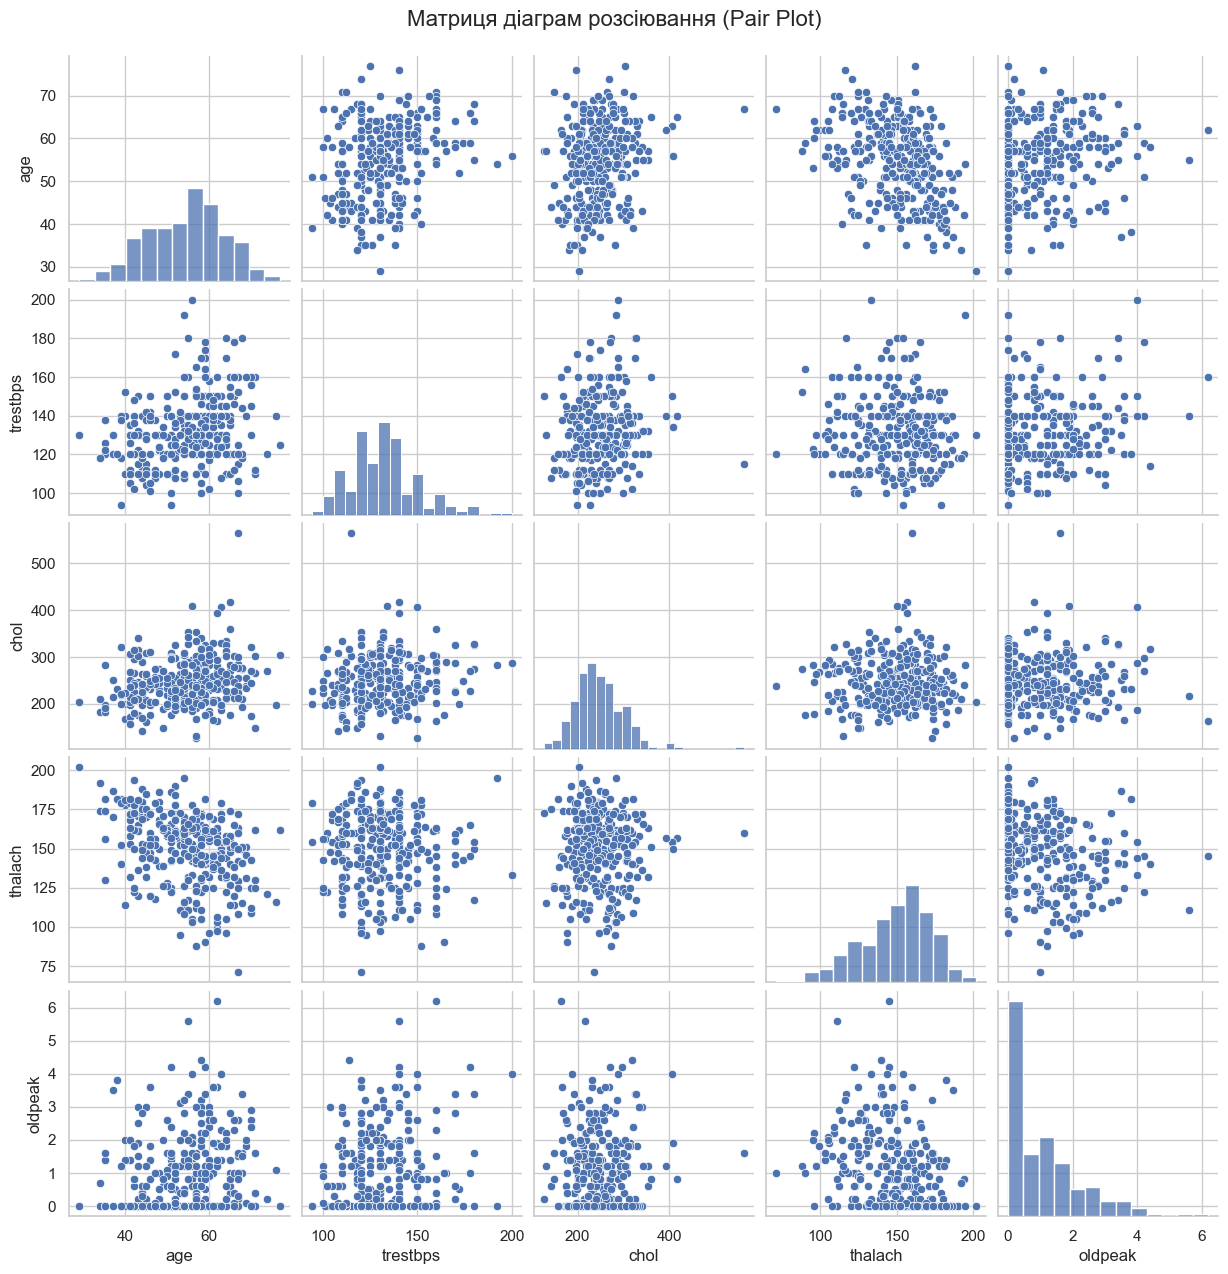

In [15]:
pairplot_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

sns.pairplot(df_cleaned[pairplot_cols])
plt.suptitle('Матриця діаграм розсіювання (Pair Plot)', y=1.02, fontsize=16)
plt.show()

Графік Boxplot, порівняємо рівень тиску у стані спокою для пацієнтів з різним типом болю в грудях
(Типи: 1: типова стенокардія, 2: атипова стенокардія, 3: неангінальний біль, 4: безсимптомний)

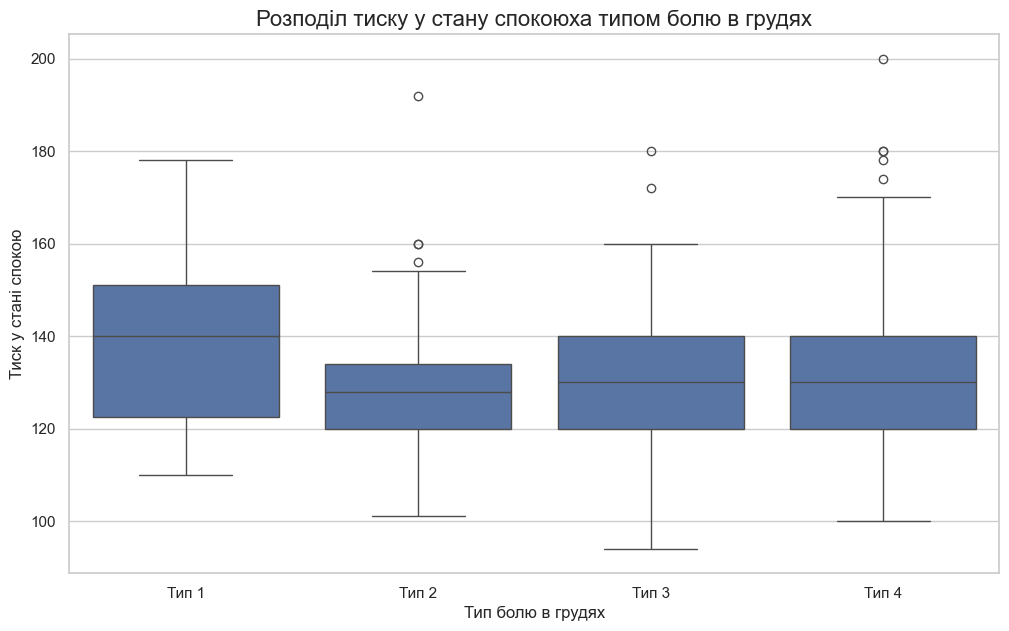

In [17]:
plt.figure(figsize = (12, 7))
sns.boxplot(data = df_cleaned, x = 'cp', y = 'trestbps')
plt.title('Розподіл тиску у стану спокоюха типом болю в грудях', fontsize = 16)
plt.xlabel('Тип болю в грудях')
plt.ylabel('Тиск у стані спокою')
plt.xticks([0, 1, 2, 3], ['Тип 1', 'Тип 2', 'Тип 3', 'Тип 4'])
plt.show()

Графік Heatmap для кореляції між усіма числовими змінними

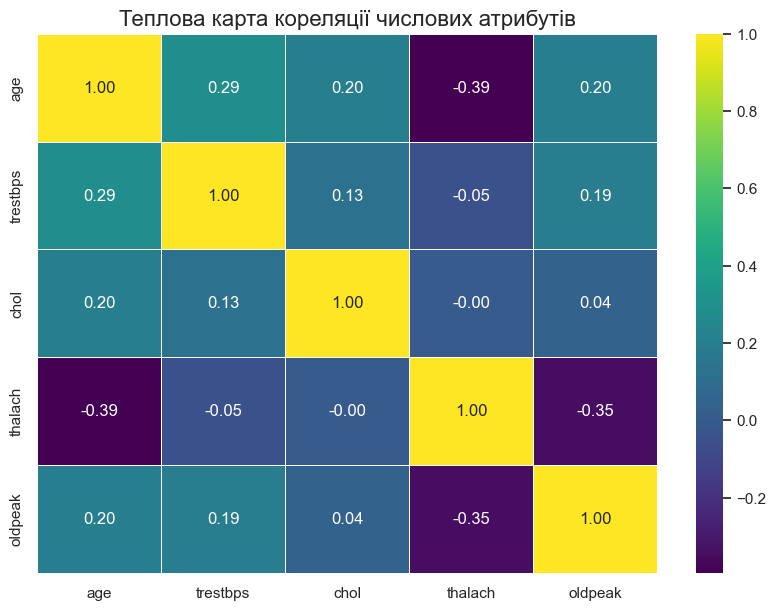

In [18]:
corr_matrix = df_cleaned[pairplot_cols].corr()

plt.figure(figsize = (10, 7))
sns.heatmap(corr_matrix, annot = True, cmap = 'viridis', fmt = '.2f', linewidth = .5)
plt.title('Теплова карта кореляції числових атрибутів', fontsize = 16)
plt.show()

Графік violin plot, подивимось на розподіл максимальної ЧСС залежно від статі

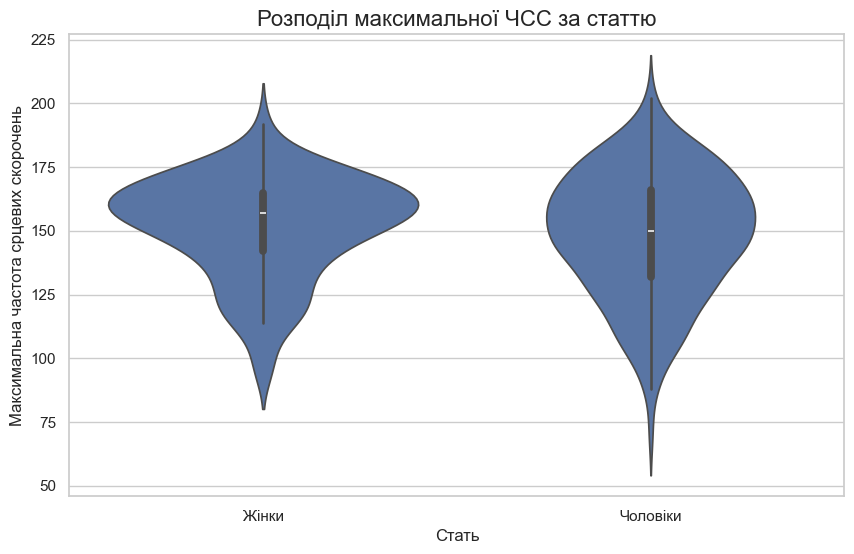

In [20]:
plt.figure(figsize = (10, 6))
sns.violinplot(data = df_cleaned, x = 'sex', y = 'thalach')
plt.title('Розподіл максимальної ЧСС за статтю', fontsize = 16)
plt.xlabel('Стать')
plt.ylabel('Максимальна частота срцевих скорочень')
plt.xticks([0, 1], ['Жінки', 'Чоловіки'])
plt.show()

Графік count plot, покажемо, скільки пацієнтів має захворювання (0 = Немає, 1-4 = Різні стадії)

C:\Users\Alexander\AppData\Local\Temp\ipykernel_26328\2649107551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['disease'] = df_cleaned['target'].apply(lambda x: 'Наявна хвороба' if x > 0 else 'Здоровий')


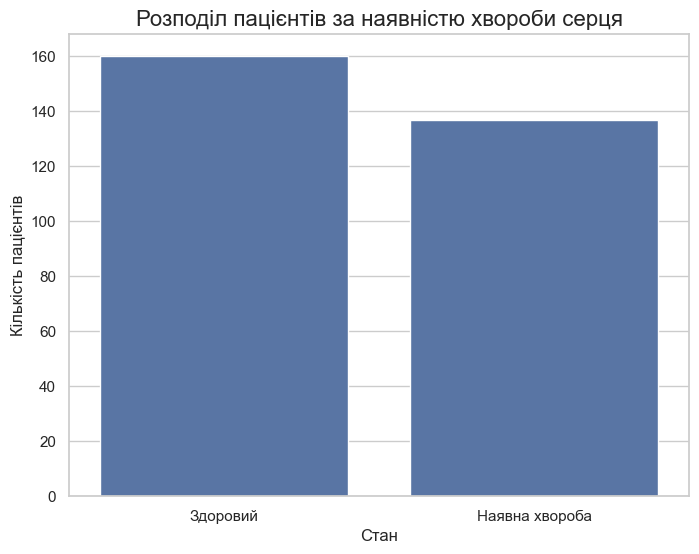

In [21]:
df_cleaned['disease'] = df_cleaned['target'].apply(lambda x: 'Наявна хвороба' if x > 0 else 'Здоровий')
plt.figure(figsize = (8, 6))
sns.countplot(data = df_cleaned, x = 'disease')
plt.title('Розподіл пацієнтів за наявністю хвороби серця', fontsize = 16)
plt.xlabel('Стан')
plt.ylabel('Кількість пацієнтів')
plt.show()